# import

In [1]:
# 한글폰트 깨짐방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,307 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

폰트를 적용하기 위해서는 상단 메뉴 "런타임> 런타임 다시 시작하기" 후 import 코드(바로 아랫줄)부터 다시 실행해야 함 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid") # choose a style for seaborn figure

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

# 용산구 월별 top10 대여소 시각화

In [10]:
top10 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/<it와비즈니스혁신>/과제 #3. 기말프로젝트/서울특별시 공공자전거 대여정보(용산구)(월별)_22.01_22.06.csv")
top10

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간,연령구분
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120,0
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58,0
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570,0
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379,1
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22077,6,4639,4639. 동빙고근린공원,3,1,3,8,686.79,5.67,24405.69,344,1
22078,6,4639,4639. 동빙고근린공원,3,1,4,15,2900.89,22.47,96820.20,566,0
22079,6,4639,4639. 동빙고근린공원,3,1,5,9,1600.71,14.41,62087.24,459,0
22080,6,4639,4639. 동빙고근린공원,3,1,6,1,37.39,0.32,1388.41,9,0


In [11]:
top10.groupby('대여소명', as_index= False).agg(n = ('이용건수', 'sum')).sort_values('n', ascending=False).head(10)

,대여소명,n
76,853.용산역 맞은편,21689
89,870.노들섬 서측 앞,18253
50,825. 서빙고동 주민센터 앞,15597
61,837. 한남나들목 입구,12362
54,829. 베르가모앞,12305
65,841. 신용산역 1번 출구,10806
45,818. 숙명여대 입구 교차로,10804
43,816. 신용산역 6번출구 앞,9861
82,860.LG한강 자이아파트 앞,9532
62,838. 숙대입구역 4번출구,9348


In [12]:
bike_top10 = top10.query('대여소번호 in [ 853, 825, 829, 870, 837, 841, 818, 816, 860, 838]')

In [13]:
bike_top10_month = bike_top10.groupby(['대여소명', '월'],  as_index= False).agg(n = ('이용건수', 'sum'))

In [17]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11, 8

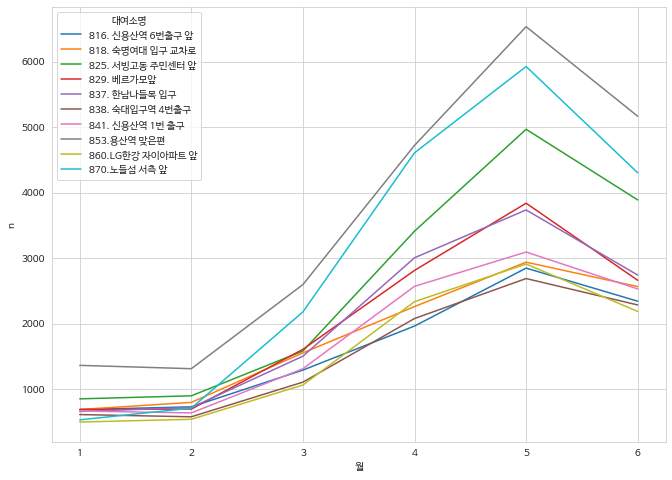

In [18]:
sns.lineplot(data = bike_top10_month, x = '월', y = 'n', hue = '대여소명')

In [19]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

# 외국인 대여정보

In [23]:
foreign = pd.read_csv("https://raw.githubusercontent.com/ITB-Project/seoul-public-bike/main/data/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0%20%EC%99%B8%EA%B5%AD%EC%9D%B8%20%EB%8C%80%EC%97%AC%EC%A0%95%EB%B3%B4(%EC%9B%94%EB%B3%84)_22.01_22.06.csv?token=GHSAT0AAAAAAB3KKOWKXLLCJDWLNCQ3JEKGY4T4BAA", encoding='CP949')
foreign

,일시,대여소,대여건수,반납건수
0,202201,1004. 삼성광나루아파트 버스정류장,0,1
1,202201,1016. 해뜨는 주유소옆 리엔파크 109동앞,0,1
2,202201,1024. 강동구청 앞,1,1
3,202201,1030. 미호 플랜트 앞,1,2
4,202201,1047. 강동 한신휴플러스,1,0
...,...,...,...,...
5128,202206,982. 녹번초등학교(서오릉로),2,2
5129,202206,989. 신응교(가좌로) 앞,1,1
5130,202206,991.흥국사 정류장,3,0
5131,202206,996.응암역2번출구 국민은행 앞,1,0


In [24]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11,8

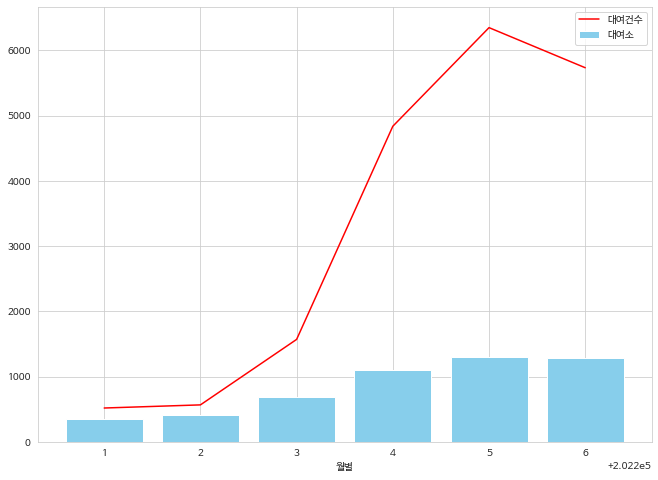

In [25]:
foreign_data = pd.DataFrame()

foreign_data['대여소'] = foreign.groupby(foreign['일시']).count()['대여소']
foreign_data

foreign_data['대여건수'] = foreign.groupby(foreign['일시']).sum()['대여건수']
foreign_data

plt.bar(foreign_data.index, foreign_data['대여소'], label='대여소', color='skyblue')
plt.plot(foreign_data.index, foreign_data['대여건수'], label='대여건수', color='red')
plt.xlabel('월별')
plt.legend()